# Q1: Random Walk and RMS distance

In [2]:
from LibPython.Library import Random
import numpy as np
from matplotlib import pyplot as plt
r = Random()

In [6]:
distcache = np.array([])
for walks in range(500):
    walker = [0, 0]
    path = np.array(walker)
    for N in range(200):
        walker += r.walk(walker)
        path = np.append(path, walker)
    distance = np.linalg.norm(walker)
    distcache = np.append(distcache, distance)

In [7]:
Rrms = np.sqrt(np.average(distcache**2))
Exp = np.sqrt(N)
print(f"The RMS distance walked by the walker is {Rrms}, and the root of N is {Exp}")

The RMS distance walked by the walker is 14.042934166334328, and the root of N is 14.106735979665885


# Q2: Fitting with Legendre Basis

In [8]:
from LibPython.Library import Statistics
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = np.genfromtxt("esem4fit.txt")
x = data[:, 0]
y = data[:, 1]
yerr = 1e-6*np.ones_like(y)

In [10]:
s = Statistics()
# Anything starting from n = 4 works, I have set the lowest number of bases as a proof of concept, but the higher we go, the better fit we have.
# But yes, for these many points anything above 4 might not be necessary.
n = 4
func = s.legendre
fitparams = s.polyfit(x, y, yerr, n=n, basis=func.__name__)

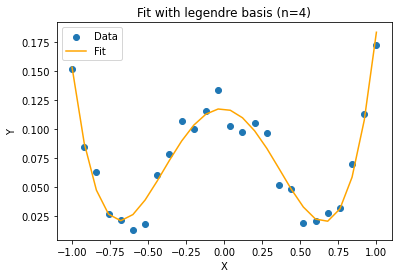

Fit function: (0.0697)P0 + (0.0036)P1 + (-0.0121)P2 + (0.0114)P3 + (0.1105)P4 (coefficients truncated)


In [11]:
yfit = np.zeros_like(y)
prntstr = ""
for i in range(n+1):
    yfit += fitparams[i]*func(i, x)
    prntstr += f"({np.round(fitparams[i], 4)})P{i} + "

plt.scatter(x, y, label="Data")
plt.plot(x, yfit, label="Fit", c='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Fit with {func.__name__} basis (n={n})")
plt.legend()
plt.show()

print(f"Fit function: {prntstr[:-3]} (coefficients truncated)")

# Q3: Heat Equation

In [12]:
from LibPython.Library import PartDiffEq
import numpy as np
from matplotlib import pyplot as plt

In [16]:
dx = 0.04
dt = 0.0008
xmax = 2
x = np.arange(0, xmax+dx, dx)
u = np.zeros((int(xmax/dx+1), 5000))

u[:, 0] = 20*np.abs(np.sin(np.pi*x))
p = PartDiffEq(dt, dx, 1, u)

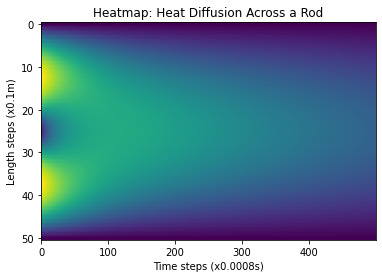

In [17]:
evol = p.explicit()
plt.imshow(evol[:, :500], aspect='auto')
plt.title('Heatmap: Heat Diffusion Across a Rod')
plt.xlabel("Time steps (x0.0008s)")
plt.ylabel("Length steps (x0.1m)")
plt.show()

# As expected, the heat concentrated at certain points now gets distributed to the nearby areas where the temperature is low.

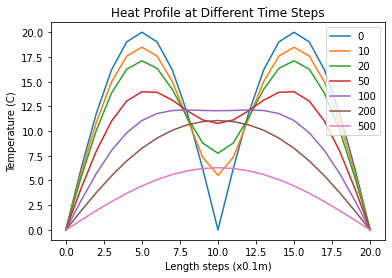

In [16]:
plt.plot(u[:, 0], label="0")
plt.plot(u[:, 10], label="10")
plt.plot(u[:, 20], label="20")
plt.plot(u[:, 50], label="50")
plt.plot(u[:, 100], label="100")
plt.plot(u[:, 200], label="200")
plt.plot(u[:, 500], label="500")
plt.title("Heat Profile at Different Time Steps")
plt.xlabel("Length steps (x0.1m)")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()

# This is a clearer picture of what is happening at the earlier stages, temperature of all regions is being brought to similar temperatures, which means
# decreasing the temperature at the hottest points, and increasing it at the coolest. Ofcourse, our boundary conditions stay.

# Q4: Gaussian Quadrature Integration

In [17]:
from LibPython.Library import Integrate
import numpy as np

In [18]:
def potfun(x):
    return 1/np.sqrt(1+x**2)
i = Integrate(potfun)

In [19]:
print("Potential at the point using Gaussian quadrature and normal integration respectively is:\n")
for n in range(4,7):
    gauss_res = i.gaussian_quadrature((-1, 1), n)
    int_res = 2*np.arcsinh(1)

    print(f"Gaussian: {gauss_res}, Normal: {int_res} for n = {n}")

print("\nThe maximum accuracy only goes up to 1e-4")

# Well, the value becomes more and more accurate as we go with higher order polynomials. This is expected, and we get a more accurate result
# as we increase the number of Legendre polynomials used. 1e-9 is near impossible to reach, but we reach within 1e-4 accuracy of the actual value,
# which I would say is good for our case

Potential at the point using Gaussian quadrature and normal integration respectively is:

Gaussian: 1.7620541789046658, Normal: 1.762747174039086 for n = 4
Gaussian: 1.7628552954010726, Normal: 1.762747174039086 for n = 5
Gaussian: 1.7627300484997588, Normal: 1.762747174039086 for n = 6

The maximum accuracy only goes up to 1e-4
